In [1]:
import numpy as np

# Main class

In [2]:
#print methods
def print_state(state):
    print("====================")
    for i in state:       
        print(i)
    print("====================")

def print_solution(solution):
    print("Solution path:")
    for state in solution:
        print_state(state)
        if(state != solution[-1]):
            print("          |          ")
            print("        \ | /        ")
            print("         \ /         ")
            print("          V          ")

class Node:
    def __init__(self,state,agent_pos,predecessor,depth,total_cost,hcost):
        self.state = state
        self.agent_pos = agent_pos
        self.predecessor = predecessor
        self.depth = depth
        self.total_cost = total_cost
        self.hcost = hcost
        
    def create_successor(self):
        x,y = self.agent_pos
        action_list = []
        #Can go right?
        if x+1 < len(self.state[0]):
            action_list.append([x+1,y])
        #Can go left?
        if x-1 >= 0:
            action_list.append([x-1,y])
        #Can go up?
        if y-1 >= 0:
            action_list.append([x,y-1])
        #Can go down?
        if y+1 < len(self.state[:][0]):
            action_list.append([x,y+1])
        #random all possible actions
        np.random.shuffle(action_list)
        
        successors = []
        for action in action_list:
            new_agent_pos = [action[0],action[1]]
            new_state = self.move(self.state,x,y,action[0],action[1])
            successor_node = Node(new_state,new_agent_pos,self,self.depth+1,self.total_cost+1,0)
            successors.append(successor_node)
        return successors
            
    def move(self,old_state,x1,y1,x2,y2):
        new_state = self.copy_state(old_state)
        new_state[x1][y1] = new_state[x2][y2]
        new_state[x2][y2] = "A"
        return new_state
    
    def copy_state(self,state):
        copy_state = []
        for row in state:
            copy_row = []
            for value in row:
                copy_row.append(value)
            copy_state.append(copy_row)
        return copy_state
    
    def get_solution(self):
        solution = []
        cur_node = self
        while cur_node is not None:
            solution.append(cur_node.state)
            cur_node = cur_node.predecessor
        solution.reverse()
        return solution
    
    #find h
    def find_hcost(self,goal_index):
        cur_index = {}
        cost = 0
        
        # find position of each required blocks ###need position of each blocks###
        for i in range(len(self.state[:][0])):
            for j in range(len(self.state[0])):
                if self.state[i][j] != "A" and self.state[i][j] != "B":
                    cur_index[self.state[i][j]] = [i,j]
                    
        for value in cur_index:
                cost = cost + abs(cur_index[value][0] - goal_index[value][0]) + abs(cur_index[value][1] - goal_index[value][1])
        # increase the cost -> improve algorithm
        return cost*3
    
    def find_fcost(self):
        return self.hcost + self.total_cost    

# Depth first search

In [3]:
def DFS(start_state,goal_state):   
    fringe = []
    explored = 0
    generated = 0
    space = 0
    
    #find a agent
    for i in range(len(start_state[:][0])):
        for j in range(len(start_state[0])):
            if start_state[i][j] == "A":
                agent_pos = [i,j]
                
    #create a node
    root = Node(start_state,agent_pos,None,0,0,0)
    generated = generated + 1
    fringe.append(root)
    space = 1
    
    while len(fringe)!=0:
        cur_node = fringe.pop(0)
        explored = explored + 1

        #check goal state
        check_state = cur_node.copy_state(cur_node.state)
        check_state[cur_node.agent_pos[0]][cur_node.agent_pos[1]] = "B"
        if(check_state == goal_state):
#             print("bingo!")
#             print("Node explored:", explored)
#             print("Node generated:", generated)
#             print("Space complexity:", space)
#             print("Depth:",cur_node.depth)
            solution = cur_node.get_solution()
#             print_solution(solution)         
            return solution, explored, generated, space, cur_node.depth
        
        #### cannot find solution ####
        if explored > 100000:
            print("More than 100000 explored! Cannot find a solution")
            print("Node explored:", explored)
            print("Node generated:", generated)
            print("Space complexity:", space)
            print("Depth:",cur_node.depth)
            return None,explored, generated, space, cur_node.depth
        ##############################
        
        #create successors
        for successor in cur_node.create_successor():
            fringe.insert(0,successor)
            generated = generated + 1
            
        #compute space complexity
        if(space < len(fringe)):
            space = len(fringe)
    # Can't find a solution
    print("Error! Cannot find a solution")
    return None, explored, generated, space, cur_node.depth

initial_state = [["B","B","B","B"],["B","B","B","B"],["B","B","B","B"],["1","2","3","A"]]
goal_state = [["B","B","B","B"],["B","1","B","B"],["B","2","B","B"],["B","3","B","B"]]
dfs_solution, dfs_explored, dfs_generated, dfs_space, dfs_depth = DFS(initial_state,goal_state)

# Breadth first search

In [4]:
def BFS(start_state,goal_state):   
    fringe = []
    explored = 0
    generated = 0
    space = 0
    
    #find a agent
    for i in range(len(start_state[:][0])):
        for j in range(len(start_state[0])):
            if start_state[i][j] == "A":
                agent_pos = [i,j]
                
    #create a node
    root = Node(start_state,agent_pos,None,0,0,0)
    generated = generated + 1
    fringe.append(root)
    space = 1
    
    while len(fringe)!=0:
        cur_node = fringe.pop(0)
        explored = explored + 1

        #check goal state
        check_state = cur_node.copy_state(cur_node.state)
        check_state[cur_node.agent_pos[0]][cur_node.agent_pos[1]] = "B"
        if(check_state == goal_state):
#             print("bingo!")
#             print("Node explored:", explored)
#             print("Node generated:", generated)
#             print("Space complexity:", space)
#             print("Depth:",cur_node.depth)
            solution = cur_node.get_solution()
#             print_solution(solution)  
            return solution, explored, generated, space, cur_node.depth
        
        #### cannot find solution ####
        if explored > 100000:
#             print("More than 100000 explored! Cannot find a solution")
#             print("Node explored:", explored)
#             print("Node generated:", generated)
#             print("Space complexity:", space)
#             print("Depth:",cur_node.depth)
            return None,explored, generated, space, cur_node.depth
        ##############################
        
        #create successors
        for successor in cur_node.create_successor():
            fringe.append(successor)
            generated = generated + 1
                        
        #compute space complexity
        if(space < len(fringe)):
            space = len(fringe)
    # Can't find a solution
    print("Error! Cannot find a solution") 
    return None, explored, generated, space, cur_node.depth
        
initial_state = [["B","B","B","B"],["B","B","B","B"],["B","B","B","B"],["1","2","3","A"]]
goal_state = [["B","B","B","B"],["B","1","B","B"],["B","2","B","B"],["B","3","B","B"]]        
bfs_solution, bfs_explored, bfs_generated, bfs_space, bfs_depth = BFS(initial_state,goal_state)

# Iterative Deepening Search

In [5]:
def IDS(start_state,goal_state):   
    fringe = []
    set_depth = 0
    explored = 0
    generated = 0
    space = 0
    
    #find a agent
    for i in range(len(start_state[:][0])):
        for j in range(len(start_state[0])):
            if start_state[i][j] == "A":
                agent_pos = [i,j]
    
    #create a node
    root = Node(start_state,agent_pos,None,0,0,0)
    generated = generated + 1
    space = 1
    
    #set depth from 0 to infinity
    while set_depth > -1:
        #delete all previous data
        del fringe[:]
        fringe.append(root)

        while len(fringe)!=0:
            cur_node = fringe.pop(0)
            explored = explored + 1

            #check goal state
            check_state = cur_node.copy_state(cur_node.state)
            check_state[cur_node.agent_pos[0]][cur_node.agent_pos[1]] = "B"
            if(check_state == goal_state):
#                 print("bingo!")
#                 print("Node explored:", explored)
#                 print("Node generated:", generated)
#                 print("Space complexity:", space)
#                 print("Depth:",cur_node.depth)
                solution = cur_node.get_solution()
#                 print_solution(solution)

                return solution, explored, generated, space, cur_node.depth
            
            #### cannot find solution ####
            if explored > 100000:
#                 print("More than 100000 explored! Cannot find a solution")
#                 print("Node explored:", explored)
#                 print("Node generated:", generated)
#                 print("Space complexity:", space)
#                 print("Depth:",cur_node.depth)
                return None,explored, generated, space, cur_node.depth
            ##############################
            
            #check if node depth equal to set_depth
            if(set_depth == cur_node.depth):
                # increase depth
                set_depth = set_depth + 1
                break
            else:
                #create successors
                for successor in cur_node.create_successor():
                    fringe.insert(0,successor)
                    generated = generated + 1
                    
            #compute space complexity
            if(space < len(fringe)):
                space = len(fringe)
    # Can't find a solution
    print("Error! Cannot find a solution")
    return None, explored, generated, space, cur_node.depth
        
initial_state = [["B","B","B","B"],["B","B","B","B"],["B","B","B","B"],["1","2","3","A"]]
goal_state = [["B","B","B","B"],["B","1","B","B"],["B","2","B","B"],["B","3","B","B"]]        
ids_solution, ids_explored, ids_generated, ids_space, ids_depth = IDS(initial_state,goal_state)

# A* Heuristic Search

In [6]:
def AHS(start_state,goal_state):   
    fringe = []
    explored = 0
    generated = 0
    space = 0
    ####
    #cost = []
    ####
    
    #find a agent
    for i in range(len(start_state[:][0])):
        for j in range(len(start_state[0])):
            if start_state[i][j] == "A":
                agent_pos = [i,j]
    
    #get goal blocks index (for finding hcost)
    goal_index = {}
    for i in range(len(goal_state[:][0])):
            for j in range(len(goal_state[0])):
                if goal_state[i][j] != "A" and goal_state[i][j] != "B":
                    goal_index[goal_state[i][j]] = [i,j]
    
    #create a node
    root = Node(start_state,agent_pos,None,0,0,0)
    generated = generated + 1
    fringe.append(root)
    space = 1
    
    while len(fringe)!=0:
        cur_node = fringe.pop(0)
        #if(len(cost)!=0):
        #    cost.pop(0)
        explored = explored + 1

        #check goal state
        check_state = cur_node.copy_state(cur_node.state)
        check_state[cur_node.agent_pos[0]][cur_node.agent_pos[1]] = "B"
        if(check_state == goal_state):
            print("bingo!")
            print("Node explored:", explored)
            print("Node generated:", generated)
            print("Space complexity:", space)
            print("Depth:",cur_node.depth)
            solution = cur_node.get_solution()
            print_solution(solution)
            
            return solution, explored, generated, space, cur_node.depth
        
        #### cannot find solution ####
        if explored > 500000:
            print("More than 500000 explored! Cannot find a solution")
            print("Node explored:", explored)
            print("Node generated:", generated)
            print("Space complexity:", space)
            print("Depth:",cur_node.depth)
            return None,explored, generated, space, cur_node.depth
        ##############################
            
        #create successors
        for successor in cur_node.create_successor():
            #calculate cost so far to reach a goal
            successor.hcost = successor.find_hcost(goal_index)
            successor_fcost = successor.find_fcost()
            #sort queue on fringe based on total cost
            if(len(fringe) != 0):
                #if last node in fringe cost less than successor cost
                if(successor_fcost >= fringe[-1].find_fcost()):
                    #cost.append(successor_fcost)
                    fringe.append(successor)
                #if first node in fringe cost less than successor cost
                elif(successor_fcost < fringe[0].find_fcost()):
                    #cost.insert(0,successor_fcost)
                    fringe.insert(0,successor)
                #if successor cost is near in the end of the fringe
                elif((successor_fcost - fringe[0].find_fcost()) > (fringe[-1].find_fcost() - successor_fcost)):
                    for i in range(len(fringe)-1, 0, -1):
                        node = fringe[i]
                        if node.find_fcost() <= successor_fcost:
                            #cost.insert(i+1,successor_fcost)
                            fringe.insert(i+1,successor)
                            break
                #if successor cost is near in the beginning of the fringe
                else:
                    for i in range(len(fringe)):
                        node = fringe[i]
                        if node.find_fcost() > successor_fcost:
                            #cost.insert(i,successor_fcost)
                            fringe.insert(i,successor)
                            break
            #if there is none in fringe
            else:
                #cost.append(successor_fcost)
                fringe.append(successor)
            generated = generated + 1
            #print(cost) 
            
        #compute space complexity
        if(space < len(fringe)):
            space = len(fringe)
    # Can't find a solution
    print("Error! Cannot find a solution")
    return None, explored, generated, space, cur_node.depth
        
initial_state = [["B","B","B","B"],["B","B","B","B"],["B","B","B","B"],["1","2","3","A"]]
goal_state = [["B","B","B","B"],["B","1","B","B"],["B","2","B","B"],["B","3","B","B"]]        
ahs_solution, ahs_explored, ahs_generated, ahs_space, ahs_depth = AHS(initial_state,goal_state)

bingo!
Node explored: 161
Node generated: 493
Space complexity: 333
Depth: 14
Solution path:
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['1', '2', '3', 'A']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'A']
['1', '2', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', 'B', 'A', 'B']
['1', '2', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', 'A', 'B', 'B']
['1', '2', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', '2', 'B', 'B']
['1', 'A', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B',

# Extra

In [33]:
def GDFS(start_state,goal_state):   
    fringe = []
    mem_state = []
    explored = 0
    generated = 0
    space = 0
    
    #find a agent
    for i in range(len(start_state[:][0])):
        for j in range(len(start_state[0])):
            if start_state[i][j] == "A":
                agent_pos = [i,j]
                
    #create a node
    root = Node(start_state,agent_pos,None,0,0,0)
    generated = generated + 1
    fringe.append(root)    
    mem_state.append(root.state)
    space = 2
    while len(fringe)!=0:
        cur_node = fringe.pop(0)
        explored = explored + 1

        #check goal state
        check_state = cur_node.copy_state(cur_node.state)
        check_state[cur_node.agent_pos[0]][cur_node.agent_pos[1]] = "B"
        if(check_state == goal_state):
            print("bingo!")
            print("Node explored:", explored)
            print("Node generated:", generated)
            print("Space complexity:", space)
            print("Depth:",cur_node.depth)
            solution = cur_node.get_solution()
            print_solution(solution)
            
            return solution, explored, generated, space, cur_node.depth
        
        #create successors
        for successor in cur_node.create_successor():
            if successor.state not in mem_state:
                mem_state.append(successor.state)
                fringe.insert(0,successor)
                generated = generated + 1
                
        #compute space complexity
        if(space < len(fringe)+len(mem_state)):
            space = len(fringe)+len(mem_state)
    # Can't find a solution
    print("Error! Cannot find a solution")
    return None, explored, generated, space, cur_node.depth

initial_state = [["B","B","B","B"],["B","B","B","B"],["B","B","B","B"],["1","2","3","A"]]
goal_state = [["B","B","B","B"],["B","1","B","B"],["B","2","B","B"],["B","3","B","B"]]
gdfs_solution, gdfs_explored, gdfs_generated, gdfs_space, gdfs_depth = GDFS(initial_state,goal_state)

bingo!
Node explored: 3972
Node generated: 7094
Space complexity: 10217
Depth: 3701
Solution path:
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['1', '2', '3', 'A']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'A']
['1', '2', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', 'B', 'A', 'B']
['1', '2', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'A', 'B']
['B', 'B', 'B', 'B']
['1', '2', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'A', 'B', 'B']
['B', 'B', 'B', 'B']
['1', '2', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['A', 'B', 'B', 'B']

In [9]:
def GBFS(start_state,goal_state):   
    fringe = []
    mem_state = []
    explored = 0
    generated = 0
    space = 0
    
    #find a agent
    for i in range(len(start_state[:][0])):
        for j in range(len(start_state[0])):
            if start_state[i][j] == "A":
                agent_pos = [i,j]
                
    #create a node
    root = Node(start_state,agent_pos,None,0,0,0)
    generated = generated + 1
    fringe.append(root)
    mem_state.append(root.state)
    space = 2
    while len(fringe)!=0:
        cur_node = fringe.pop(0)
        explored = explored + 1

        #check goal state
        check_state = cur_node.copy_state(cur_node.state)
        check_state[cur_node.agent_pos[0]][cur_node.agent_pos[1]] = "B"
        if(check_state == goal_state):
            print("bingo!")
            print("Node explored:", explored)
            print("Node generated:", generated)
            print("Space complexity:", space)
            print("Depth:",cur_node.depth)
            solution = cur_node.get_solution()
            print_solution(solution)
            
            return solution, explored, generated, space, cur_node.depth
        
        #create successors
        for successor in cur_node.create_successor():
            if successor.state not in mem_state:
                mem_state.append(successor.state)
                fringe.append(successor)
                generated = generated + 1
                
        #compute space complexity
        if(space < len(fringe)+len(mem_state)):
            space = len(fringe)+len(mem_state)       
    # Can't find a solution
    print("Error! Cannot find a solution") 
    return None, explored, generated, space, cur_node.depth
        
initial_state = [["B","B","B","B"],["B","B","B","B"],["B","B","B","B"],["1","2","3","A"]]
goal_state = [["B","B","B","B"],["B","1","B","B"],["B","2","B","B"],["B","3","B","B"]]        
gbfs_solution, gbfs_explored, gbfs_generated, gbfs_space, gbfs_depth = GBFS(initial_state,goal_state)   

bingo!
Node explored: 2053
Node generated: 2914
Space complexity: 3776
Depth: 14
Solution path:
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['1', '2', '3', 'A']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'A']
['1', '2', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', 'B', 'A', 'B']
['1', '2', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', 'A', 'B', 'B']
['1', '2', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', '2', 'B', 'B']
['1', 'A', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['

In [10]:
def GIDS(start_state,goal_state):   
    fringe = []
    set_depth = 0
    mem_state = []
    explored = 0
    generated = 0
    space = 0
    
    #find a agent
    for i in range(len(start_state[:][0])):
        for j in range(len(start_state[0])):
            if start_state[i][j] == "A":
                agent_pos = [i,j]
    
    #create a node
    root = Node(start_state,agent_pos,None,0,0,0)
    generated = generated + 1
    space = 2
    
    #set depth from 0 to infinity
    while set_depth > -1:
        #delete all previous data
        del fringe[:]
        del mem_state[:]
        fringe.append(root)

        mem_state.append(root.state)
        while len(fringe)!=0:
            cur_node = fringe.pop(0)
            explored = explored + 1

            #check goal state
            check_state = cur_node.copy_state(cur_node.state)
            check_state[cur_node.agent_pos[0]][cur_node.agent_pos[1]] = "B"
            if(check_state == goal_state):
                print("bingo!")
                print("Node explored:", explored)
                print("Node generated:", generated)
                print("Space complexity:", space)
                print("Depth:",cur_node.depth)
                solution = cur_node.get_solution()
                print_solution(solution)

                return solution, explored, generated, space, cur_node.depth
            
            #check if node depth equal to set_depth
            if(set_depth == cur_node.depth):
                # increase depth
                set_depth = set_depth + 1
                break
            else:
                #create successors
                for successor in cur_node.create_successor():
                    if successor.state not in mem_state:
                        mem_state.append(successor.state)
                        fringe.insert(0,successor)
                        generated = generated + 1
                        
            #compute space complexity
            if(space < len(fringe)+len(mem_state)):
                space = len(fringe)+len(mem_state) 
    # Can't find a solution
    print("Error! Cannot find a solution")
    return None, explored, generated, space, cur_node.depth
        
initial_state = [["B","B","B","B"],["B","B","B","B"],["B","B","B","B"],["1","2","3","A"]]
goal_state = [["B","B","B","B"],["B","1","B","B"],["B","2","B","B"],["B","3","B","B"]]        
gids_solution, gids_explored, gids_generated, gids_space, gids_depth = GIDS(initial_state,goal_state) 

bingo!
Node explored: 5754
Node generated: 10017
Space complexity: 282
Depth: 41
Solution path:
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['1', '2', '3', 'A']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'A']
['1', '2', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', 'B', 'A', 'B']
['1', '2', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'A', 'B']
['B', 'B', 'B', 'B']
['1', '2', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'A', 'B']
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['1', '2', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'A', 'B', 'B']
['B', 'B', 'B', 'B']
['

In [11]:
def GAHS(start_state,goal_state):   
    fringe = []
    mem_state = []
    explored = 0
    generated = 0
    space = 0
    
    #find a agent
    for i in range(len(start_state[:][0])):
        for j in range(len(start_state[0])):
            if start_state[i][j] == "A":
                agent_pos = [i,j]
    
    #get goal blocks index (for finding hcost)
    goal_index = {}
    for i in range(len(goal_state[:][0])):
            for j in range(len(goal_state[0])):
                if goal_state[i][j] != "A" and goal_state[i][j] != "B":
                    goal_index[goal_state[i][j]] = [i,j]
    
    #create a node
    root = Node(start_state,agent_pos,None,0,0,0)
    generated = generated + 1
    fringe.append(root)
    mem_state.append(root.state)
    space = 2
    while len(fringe)!=0:
        cur_node = fringe.pop(0)
        explored = explored + 1

        #check goal state
        check_state = cur_node.copy_state(cur_node.state)
        check_state[cur_node.agent_pos[0]][cur_node.agent_pos[1]] = "B"
        if(check_state == goal_state):
            print("bingo!")
            print("Node explored:", explored)
            print("Node generated:", generated)
            print("Space complexity:", space)
            print("Depth:",cur_node.depth)
            solution = cur_node.get_solution()
            print_solution(solution)
            
            return solution, explored, generated, space, cur_node.depth
        
        #create successors
        for successor in cur_node.create_successor():
            if successor.state not in mem_state:
                mem_state.append(successor.state)
                #calculate cost so far to reach a goal
                successor.hcost = successor.find_hcost(goal_index)
                successor_fcost = successor.find_fcost()
                #sort queue on fringe based on total cost
                if(len(fringe) != 0):
                    #if last node in fringe cost less than successor cost
                    if(successor_fcost >= fringe[-1].find_fcost()):
                        fringe.append(successor)
                    #if first node in fringe cost less than successor cost
                    elif(successor_fcost < fringe[0].find_fcost()):
                        fringe.insert(0,successor)
                    #if successor cost is near in the end of the fringe
                    elif((successor_fcost - fringe[0].find_fcost()) > (fringe[-1].find_fcost() - successor_fcost)):
                        for i in range(len(fringe)-1, 0, -1):
                            node = fringe[i]
                            if node.find_fcost() <= successor_fcost:
                                fringe.insert(i+1,successor)
                                break
                    #if successor cost is near in the beginning of the fringe
                    else:
                        for i in range(len(fringe)):
                            node = fringe[i]
                            if node.find_fcost() > successor_fcost:
                                fringe.insert(i,successor)
                                break
                #if there is none in fringe
                else:
                    fringe.append(successor)
                generated = generated + 1
        
        #compute space complexity
        if(space < len(fringe)+len(mem_state)):
            space = len(fringe)+len(mem_state)
            
    # Can't find a solution
    print("Error! Cannot find a solution")
    return None, explored, generated, space, cur_node.depth
        
initial_state = [["B","B","B","B"],["B","B","B","B"],["B","B","B","B"],["1","2","3","A"]]
goal_state = [["B","B","B","B"],["B","1","B","B"],["B","2","B","B"],["B","3","B","B"]]        
gahs_solution, gahs_explored, gahs_generated, gahs_space, gahs_depth = GAHS(initial_state,goal_state) 

bingo!
Node explored: 43
Node generated: 67
Space complexity: 92
Depth: 14
Solution path:
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['1', '2', '3', 'A']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'A']
['1', '2', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', 'B', 'A', 'B']
['1', '2', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', 'A', 'B', 'B']
['1', '2', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', '2', 'B', 'B']
['1', 'A', '3', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', 'B', 'B', 'B']
['B', '2

# Analysis

In [12]:
initial_state = [["B","B","B","B"],["B","B","B","B"],["B","B","B","B"],["1","2","3","A"]]
goal_state = [["B","B","B","B"],["B","1","B","B"],["B","2","B","B"],["B","3","B","B"]]

# depth difficulty
initial_depth_state = [[['B', 'B', 'B', 'B'], ['B', '1', 'B', 'B'], ['2', 'A', 'B', 'B'], ['B', '3', 'B', 'B']], [['B', 'B', 'B', 'B'], ['B', 'A', 'B', 'B'], ['2', '1', 'B', 'B'], ['B', '3', 'B', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'A', 'B'], ['2', '1', 'B', 'B'], ['B', '3', 'B', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['2', '1', 'A', 'B'], ['B', '3', 'B', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['2', '1', 'B', 'B'], ['B', '3', 'A', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['2', '1', 'B', 'B'], ['B', 'A', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['2', 'A', 'B', 'B'], ['B', '1', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['A', '2', 'B', 'B'], ['B', '1', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['B', '2', 'B', 'B'], ['A', '1', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['B', '2', 'B', 'B'], ['1', 'A', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['B', 'A', 'B', 'B'], ['1', '2', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['B', 'B', 'A', 'B'], ['1', '2', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'A'], ['1', '2', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['1', '2', '3', 'A']]]

#print_state(initial_depth_state)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt 

initial_depth_state = [[['B', 'B', 'B', 'B'], ['B', '1', 'B', 'B'], ['2', 'A', 'B', 'B'], ['B', '3', 'B', 'B']], [['B', 'B', 'B', 'B'], ['B', 'A', 'B', 'B'], ['2', '1', 'B', 'B'], ['B', '3', 'B', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'A', 'B'], ['2', '1', 'B', 'B'], ['B', '3', 'B', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['2', '1', 'A', 'B'], ['B', '3', 'B', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['2', '1', 'B', 'B'], ['B', '3', 'A', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['2', '1', 'B', 'B'], ['B', 'A', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['2', 'A', 'B', 'B'], ['B', '1', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['A', '2', 'B', 'B'], ['B', '1', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['B', '2', 'B', 'B'], ['A', '1', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['B', '2', 'B', 'B'], ['1', 'A', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['B', 'A', 'B', 'B'], ['1', '2', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['B', 'B', 'A', 'B'], ['1', '2', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'A'], ['1', '2', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['1', '2', '3', 'A']]]
goal_state = [["B","B","B","B"],["B","1","B","B"],["B","2","B","B"],["B","3","B","B"]]
n_average = 3

depth = 0
depthx = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
#Node exparison
dfs_eploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
bfs_eploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
ids_eploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
ahs_eploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#Node generation (Time Complexity)
dfs_gploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
bfs_gploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
ids_gploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
ahs_gploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#Space Complexity
dfs_sploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
bfs_sploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
ids_sploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
ahs_sploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0] 

for i in range(n_average):
    for initial_state in initial_depth_state:
        dfs_solution, dfs_explored, dfs_generated, dfs_space, dfs_depth = DFS(initial_state,goal_state)
        bfs_solution, bfs_explored, bfs_generated, bfs_space, bfs_depth = BFS(initial_state,goal_state)
        ids_solution, ids_explored, ids_generated, ids_space, ids_depth = IDS(initial_state,goal_state)
        ahs_solution, ahs_explored, ahs_generated, ahs_space, ahs_depth = AHS(initial_state,goal_state)

        dfs_eploty[depth] = dfs_eploty[depth] + dfs_explored
        bfs_eploty[depth] = bfs_eploty[depth] + bfs_explored
        ids_eploty[depth] = ids_eploty[depth] + ids_explored
        ahs_eploty[depth] = ahs_eploty[depth] + ahs_explored

        dfs_gploty[depth] = dfs_gploty[depth] + dfs_generated
        bfs_gploty[depth] = bfs_gploty[depth] + bfs_generated
        ids_gploty[depth] = ids_gploty[depth] + ids_generated
        ahs_gploty[depth] = ahs_gploty[depth] + ahs_generated

        dfs_sploty[depth] = dfs_sploty[depth] + dfs_space
        bfs_sploty[depth] = bfs_sploty[depth] + bfs_space
        ids_sploty[depth] = ids_sploty[depth] + ids_space
        ahs_sploty[depth] = ahs_sploty[depth] + ahs_space

        depth = depth + 1
    depth = 0

for i in range(len(depthx)):
    dfs_eploty[i] = int(dfs_eploty[i] / n_average)
    bfs_eploty[i] = int(bfs_eploty[i] / n_average)
    ids_eploty[i] = int(ids_eploty[i] / n_average)
    ahs_eploty[i] = int(ahs_eploty[i] / n_average)

    dfs_gploty[i] = int(dfs_gploty[i] / n_average)
    bfs_gploty[i] = int(bfs_gploty[i] / n_average)
    ids_gploty[i] = int(ids_gploty[i] / n_average)
    ahs_gploty[i] = int(ahs_gploty[i] / n_average)

    dfs_sploty[i] = int(dfs_sploty[i] / n_average)
    bfs_sploty[i] = int(bfs_sploty[i] / n_average)
    ids_sploty[i] = int(ids_sploty[i] / n_average)
    ahs_sploty[i] = int(ahs_sploty[i] / n_average)

bingo!
Node explored: 2
Node generated: 5
Space complexity: 4
Depth: 1
Solution path:
['B', 'B', 'B', 'B']
['B', '1', 'B', 'B']
['2', 'A', 'B', 'B']
['B', '3', 'B', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', '1', 'B', 'B']
['A', '2', 'B', 'B']
['B', '3', 'B', 'B']
bingo!
Node explored: 3
Node generated: 9
Space complexity: 7
Depth: 2
Solution path:
['B', 'B', 'B', 'B']
['B', 'A', 'B', 'B']
['2', '1', 'B', 'B']
['B', '3', 'B', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', '1', 'B', 'B']
['2', 'A', 'B', 'B']
['B', '3', 'B', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', '1', 'B', 'B']
['A', '2', 'B', 'B']
['B', '3', 'B', 'B']
More than 100000 explored! Cannot find a solution
Node explored: 100001
Node generated: 316760
Space complexity: 216760
Depth: 100000
bingo!
Nod

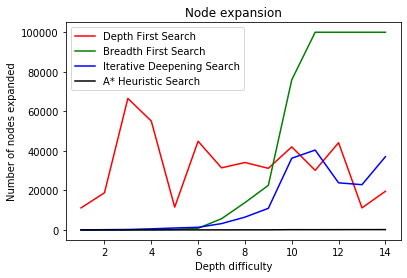

<Figure size 1440x720 with 0 Axes>

In [14]:
#Node expansion
plt.plot(depthx, dfs_eploty, 'r', label='Depth First Search')
plt.plot(depthx, bfs_eploty, 'g', label='Breadth First Search')
plt.plot(depthx, ids_eploty, 'b', label='Iterative Deepening Search')
plt.plot(depthx, ahs_eploty, 'black', label='A* Heuristic Search')

plt.xlabel('Depth difficulty') 
plt.ylabel('Number of nodes expanded') 
plt.legend(loc="upper left")
plt.title('Node expansion')
plt.figure(figsize=(20,10))
plt.show()

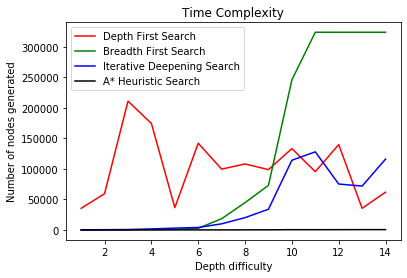

<Figure size 1440x720 with 0 Axes>

In [15]:
#Time complexity
plt.plot(depthx, dfs_gploty, 'r', label='Depth First Search')
plt.plot(depthx, bfs_gploty, 'g', label='Breadth First Search')
plt.plot(depthx, ids_gploty, 'b', label='Iterative Deepening Search')
plt.plot(depthx, ahs_gploty, 'black', label='A* Heuristic Search')

plt.xlabel('Depth difficulty') 
plt.ylabel('Number of nodes generated') 
plt.legend(loc="upper left")
plt.title('Time Complexity')
plt.figure(figsize=(20,10))
plt.show()

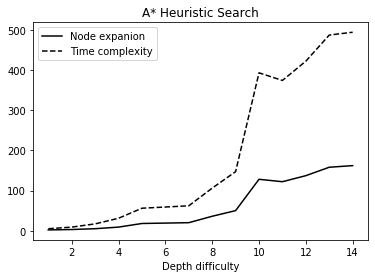

<Figure size 1440x720 with 0 Axes>

In [17]:
plt.plot(depthx, ahs_eploty, 'black', label='Node expanion')
plt.plot(depthx, ahs_gploty, 'black', linestyle='dashed', label='Time complexity')

plt.xlabel('Depth difficulty') 
plt.legend(loc="upper left")
plt.title('A* Heuristic Search')
plt.figure(figsize=(20,10))
plt.show()

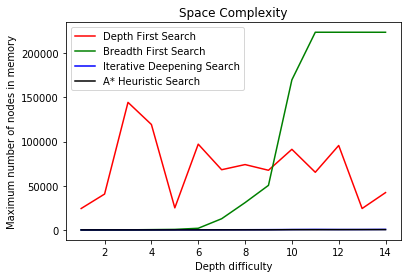

<Figure size 1440x720 with 0 Axes>

In [18]:
#Space complexity
plt.plot(depthx, dfs_sploty, 'r', label='Depth First Search')
plt.plot(depthx, bfs_sploty, 'g', label='Breadth First Search')
plt.plot(depthx, ids_sploty, 'b', label='Iterative Deepening Search')
plt.plot(depthx, ahs_sploty, 'black', label='A* Heuristic Search')

plt.xlabel('Depth difficulty') 
plt.ylabel('Maximum number of nodes in memory') 
plt.legend(loc="upper left")
plt.title('Space Complexity')
plt.figure(figsize=(20,10))
plt.show()

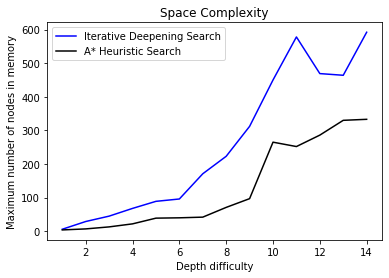

<Figure size 1440x720 with 0 Axes>

In [19]:
plt.plot(depthx, ids_sploty, 'b', label='Iterative Deepening Search')
plt.plot(depthx, ahs_sploty, 'black', label='A* Heuristic Search')

plt.xlabel('Depth difficulty') 
plt.ylabel('Maximum number of nodes in memory') 
plt.legend(loc="upper left")
plt.title('Space Complexity')
plt.figure(figsize=(20,10))
plt.show()

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt 

initial_depth_state = [[['B', 'B', 'B', 'B'], ['B', '1', 'B', 'B'], ['2', 'A', 'B', 'B'], ['B', '3', 'B', 'B']], [['B', 'B', 'B', 'B'], ['B', 'A', 'B', 'B'], ['2', '1', 'B', 'B'], ['B', '3', 'B', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'A', 'B'], ['2', '1', 'B', 'B'], ['B', '3', 'B', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['2', '1', 'A', 'B'], ['B', '3', 'B', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['2', '1', 'B', 'B'], ['B', '3', 'A', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['2', '1', 'B', 'B'], ['B', 'A', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['2', 'A', 'B', 'B'], ['B', '1', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['A', '2', 'B', 'B'], ['B', '1', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['B', '2', 'B', 'B'], ['A', '1', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['B', '2', 'B', 'B'], ['1', 'A', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['B', 'A', 'B', 'B'], ['1', '2', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['B', 'B', 'A', 'B'], ['1', '2', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'A'], ['1', '2', '3', 'B']], [['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['B', 'B', 'B', 'B'], ['1', '2', '3', 'A']]]
goal_state = [["B","B","B","B"],["B","1","B","B"],["B","2","B","B"],["B","3","B","B"]]
n_average = 3

depth = 0
depthx = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
#Node exparison
gdfs_eploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
gbfs_eploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
gids_eploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
gahs_eploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#Node generation (Time Complexity)
gdfs_gploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
gbfs_gploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
gids_gploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
gahs_gploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#Space Complexity
gdfs_sploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
gbfs_sploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
gids_sploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
gahs_sploty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0] 

for i in range(n_average):
    for initial_state in initial_depth_state:
        gdfs_solution, gdfs_explored, gdfs_generated, gdfs_space, gdfs_depth = GDFS(initial_state,goal_state)

        gdfs_eploty[depth] = gdfs_eploty[depth] + gdfs_explored

        gdfs_gploty[depth] = gdfs_gploty[depth] + gdfs_generated

        gdfs_sploty[depth] = gdfs_sploty[depth] + gdfs_space

        depth = depth + 1
    depth = 0

for i in range(len(depthx)):
    gdfs_eploty[i] = int(gdfs_eploty[i] / n_average)

    gdfs_gploty[i] = int(gdfs_gploty[i] / n_average)

    gdfs_sploty[i] = int(gdfs_sploty[i] / n_average)

KeyboardInterrupt: 

In [21]:
depth = 0
for i in range(n_average):
    for initial_state in initial_depth_state:
        gbfs_solution, gbfs_explored, gbfs_generated, gbfs_space, gbfs_depth = GBFS(initial_state,goal_state)

        gbfs_eploty[depth] = gbfs_eploty[depth] + gbfs_explored

        gbfs_gploty[depth] = gbfs_gploty[depth] + gbfs_generated

        gbfs_sploty[depth] = gbfs_sploty[depth] + gbfs_space

        depth = depth + 1
    depth = 0

for i in range(len(depthx)):
    gbfs_eploty[i] = int(gbfs_eploty[i] / n_average)

    gbfs_gploty[i] = int(gbfs_gploty[i] / n_average)

    gbfs_sploty[i] = int(gbfs_sploty[i] / n_average)

bingo!
Node explored: 3
Node generated: 8
Space complexity: 14
Depth: 1
Solution path:
['B', 'B', 'B', 'B']
['B', '1', 'B', 'B']
['2', 'A', 'B', 'B']
['B', '3', 'B', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', '1', 'B', 'B']
['A', '2', 'B', 'B']
['B', '3', 'B', 'B']
bingo!
Node explored: 10
Node generated: 20
Space complexity: 31
Depth: 2
Solution path:
['B', 'B', 'B', 'B']
['B', 'A', 'B', 'B']
['2', '1', 'B', 'B']
['B', '3', 'B', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', '1', 'B', 'B']
['2', 'A', 'B', 'B']
['B', '3', 'B', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', '1', 'B', 'B']
['A', '2', 'B', 'B']
['B', '3', 'B', 'B']
bingo!
Node explored: 21
Node generated: 36
Space complexity: 52
Depth: 3
Solution path:
['B', 'B', 'B', 'B']
['B', 'B', 'A', 'B']
['2', '1'

In [22]:
depth = 0
for i in range(n_average):
    for initial_state in initial_depth_state:
        gids_solution, gids_explored, gids_generated, gids_space, gids_depth = GIDS(initial_state,goal_state)

        gids_eploty[depth] = gids_eploty[depth] + gids_explored

        gids_gploty[depth] = gids_gploty[depth] + gids_generated

        gids_sploty[depth] = gids_sploty[depth] + gids_space

        depth = depth + 1
    depth = 0

for i in range(len(depthx)):
    gids_eploty[i] = int(gids_eploty[i] / n_average)
    
    gids_gploty[i] = int(gids_gploty[i] / n_average)

    gids_sploty[i] = int(gids_sploty[i] / n_average)

bingo!
Node explored: 3
Node generated: 5
Space complexity: 9
Depth: 1
Solution path:
['B', 'B', 'B', 'B']
['B', '1', 'B', 'B']
['2', 'A', 'B', 'B']
['B', '3', 'B', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', '1', 'B', 'B']
['A', '2', 'B', 'B']
['B', '3', 'B', 'B']
bingo!
Node explored: 353
Node generated: 597
Space complexity: 73
Depth: 2
Solution path:
['B', 'B', 'B', 'B']
['B', 'A', 'B', 'B']
['2', '1', 'B', 'B']
['B', '3', 'B', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', '1', 'B', 'B']
['2', 'A', 'B', 'B']
['B', '3', 'B', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', '1', 'B', 'B']
['A', '2', 'B', 'B']
['B', '3', 'B', 'B']
bingo!
Node explored: 1018
Node generated: 1809
Space complexity: 132
Depth: 10
Solution path:
['B', 'B', 'B', 'B']
['B', 'B', 'A', 'B']
['

In [23]:
depth = 0
for i in range(n_average):
    for initial_state in initial_depth_state:
        gahs_solution, gahs_explored, gahs_generated, gahs_space, gahs_depth = GAHS(initial_state,goal_state)

        gahs_eploty[depth] = gahs_eploty[depth] + gahs_explored

        gahs_gploty[depth] = gahs_gploty[depth] + gahs_generated

        gahs_sploty[depth] = gahs_sploty[depth] + gahs_space

        depth = depth + 1
    depth = 0

for i in range(len(depthx)):
    gahs_eploty[i] = int(gahs_eploty[i] / n_average)

    gahs_gploty[i] = int(gahs_gploty[i] / n_average)

    gahs_sploty[i] = int(gahs_sploty[i] / n_average)

bingo!
Node explored: 2
Node generated: 5
Space complexity: 9
Depth: 1
Solution path:
['B', 'B', 'B', 'B']
['B', '1', 'B', 'B']
['2', 'A', 'B', 'B']
['B', '3', 'B', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', '1', 'B', 'B']
['A', '2', 'B', 'B']
['B', '3', 'B', 'B']
bingo!
Node explored: 3
Node generated: 8
Space complexity: 13
Depth: 2
Solution path:
['B', 'B', 'B', 'B']
['B', 'A', 'B', 'B']
['2', '1', 'B', 'B']
['B', '3', 'B', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', '1', 'B', 'B']
['2', 'A', 'B', 'B']
['B', '3', 'B', 'B']
          |          
        \ | /        
         \ /         
          V          
['B', 'B', 'B', 'B']
['B', '1', 'B', 'B']
['A', '2', 'B', 'B']
['B', '3', 'B', 'B']
bingo!
Node explored: 7
Node generated: 15
Space complexity: 24
Depth: 3
Solution path:
['B', 'B', 'B', 'B']
['B', 'B', 'A', 'B']
['2', '1', 'B

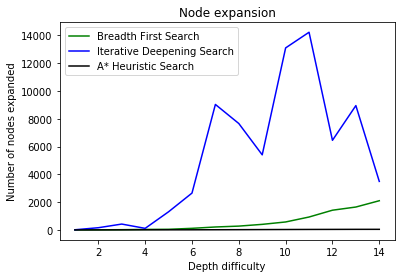

<Figure size 1440x720 with 0 Axes>

In [24]:
#Node expansion
#plt.plot(depthx, gdfs_eploty, 'r', label='Depth First Search')
plt.plot(depthx, gbfs_eploty, 'g', label='Breadth First Search')
plt.plot(depthx, gids_eploty, 'b', label='Iterative Deepening Search')
plt.plot(depthx, gahs_eploty, 'black', label='A* Heuristic Search')

plt.xlabel('Depth difficulty') 
plt.ylabel('Number of nodes expanded') 
plt.legend(loc="upper left")
plt.title('Node expansion')
plt.figure(figsize=(20,10))
plt.show()

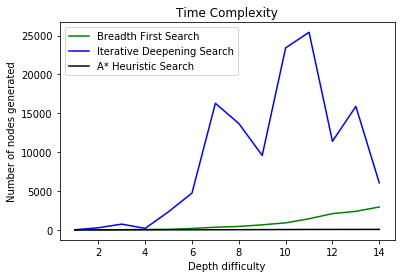

<Figure size 1440x720 with 0 Axes>

In [25]:
#Time complexity
#plt.plot(depthx, gdfs_gploty, 'r', label='Depth First Search')
plt.plot(depthx, gbfs_gploty, 'g', label='Breadth First Search')
plt.plot(depthx, gids_gploty, 'b', label='Iterative Deepening Search')
plt.plot(depthx, gahs_gploty, 'black', label='A* Heuristic Search')

plt.xlabel('Depth difficulty') 
plt.ylabel('Number of nodes generated') 
plt.legend(loc="upper left")
plt.title('Time Complexity')
plt.figure(figsize=(20,10))
plt.show()

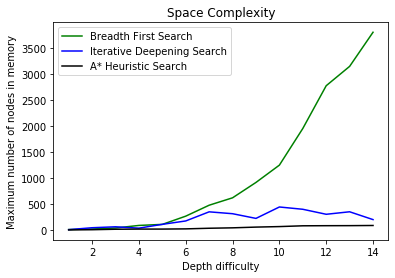

<Figure size 1440x720 with 0 Axes>

In [27]:
#Space Complexity
#plt.plot(depthx, gdfs_sploty, 'r', label='Depth First Search')
plt.plot(depthx, gbfs_sploty, 'g', label='Breadth First Search')
plt.plot(depthx, gids_sploty, 'b', label='Iterative Deepening Search')
plt.plot(depthx, gahs_sploty, 'black', label='A* Heuristic Search')

plt.xlabel('Depth difficulty') 
plt.ylabel('Maximum number of nodes in memory') 
plt.legend(loc="upper left")
plt.title('Space Complexity')
plt.figure(figsize=(20,10))
plt.show()

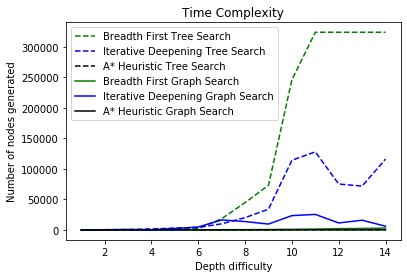

<Figure size 1440x720 with 0 Axes>

In [30]:
plt.plot(depthx, bfs_gploty, 'g', linestyle='dashed', label='Breadth First Tree Search')
plt.plot(depthx, ids_gploty, 'b', linestyle='dashed', label='Iterative Deepening Tree Search')
plt.plot(depthx, ahs_gploty, 'black', linestyle='dashed', label='A* Heuristic Tree Search')
plt.plot(depthx, gbfs_gploty, 'g', label='Breadth First Graph Search')
plt.plot(depthx, gids_gploty, 'b', label='Iterative Deepening Graph Search')
plt.plot(depthx, gahs_gploty, 'black', label='A* Heuristic Graph Search')

plt.xlabel('Depth difficulty') 
plt.ylabel('Number of nodes generated') 
plt.legend(loc="upper left")
plt.title('Time Complexity')
plt.figure(figsize=(20,10))
plt.show()

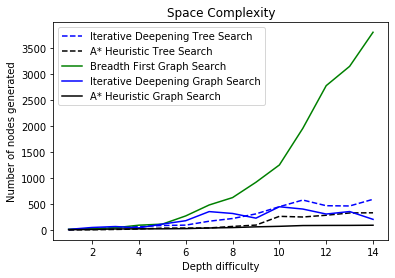

<Figure size 1440x720 with 0 Axes>

In [32]:
#plt.plot(depthx, bfs_sploty, 'g', linestyle='dashed', label='Breadth First Tree Search')
plt.plot(depthx, ids_sploty, 'b', linestyle='dashed', label='Iterative Deepening Tree Search')
plt.plot(depthx, ahs_sploty, 'black', linestyle='dashed', label='A* Heuristic Tree Search')
plt.plot(depthx, gbfs_sploty, 'g', label='Breadth First Graph Search')
plt.plot(depthx, gids_sploty, 'b', label='Iterative Deepening Graph Search')
plt.plot(depthx, gahs_sploty, 'black', label='A* Heuristic Graph Search')

plt.xlabel('Depth difficulty') 
plt.ylabel('Number of nodes generated') 
plt.legend(loc="upper left")
plt.title('Space Complexity')
plt.figure(figsize=(20,10))
plt.show()